# Creating and Backtesting EMA Strategies

## Getting the Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import yfinance as yf

In [6]:
start1 = '2018-01-01'
end1='2021-03-01'
# looping over tickers and creating a dataframe with close prices
stocks = yf.download('spy',start1,end1,interval='1d')
stocks['price'] = stocks['Close']
data =stocks.copy()

[*********************100%***********************]  1 of 1 completed


## Defining an EMA Crossover Strategy

In [7]:
ema_s = 21
ema_l = 50
ema_d = 200

In [8]:
data["EMA_21"] = data.price.ewm(span = ema_s, min_periods = ema_s).mean() 

In [9]:
data["EMA_50"] = data.price.ewm(span = ema_l, min_periods = ema_l).mean() 

In [10]:
data["EMA_200"] = data.price.ewm(span = ema_l, min_periods = ema_d).mean() 

In [12]:
data = data[['Close','EMA_21',"EMA_50","EMA_200"]]

In [14]:
data.dropna(inplace = True)
#data.dropna(inplace = True)

<ipython-input-14-48a623a66630>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace = True)


In [15]:
signal = []
 for i in range(lend(data)):
        if Close[i]>MA_21[i]
            signal.append(1)
        elif EMA_21[i] >Close[i]>= EMA_50[i]:
            singal.append(0)
        else:
            signal.append(-1)
            
            

Close      EMA_21      EMA_50     EMA_200
Date                                                      
2018-10-16  280.399994  284.583971  285.333123  285.333123
2018-10-17  280.450012  284.208157  285.141567  285.141567
2018-10-18  276.399994  283.498324  284.798654  284.798654
2018-10-19  276.250000  282.839385  284.463313  284.463313
2018-10-22  275.010010  282.127624  284.092490  284.092490
...                ...         ...         ...         ...
2021-02-22  387.029999  386.161472  378.308422  378.308422
2021-02-23  387.500000  386.283157  378.668876  378.668876
2021-02-24  391.769989  386.781960  379.182646  379.182646
2021-02-25  382.329987  386.377235  379.306071  379.306071
2021-02-26  380.359985  385.830212  379.347401  379.347401

[595 rows x 4 columns]

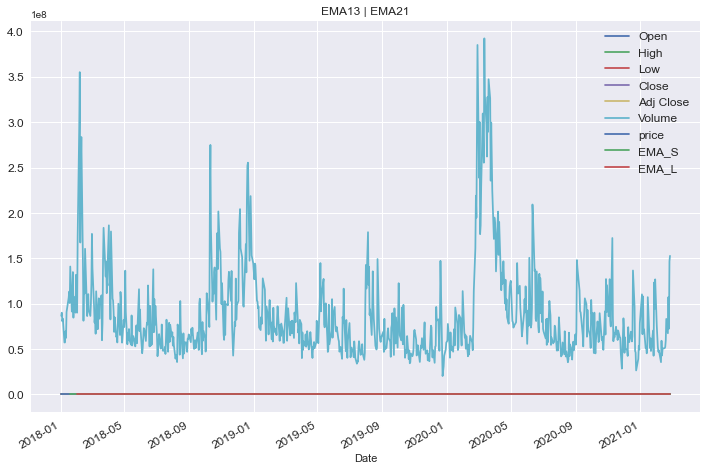

In [124]:
data.plot(figsize = (12, 8), title = "EMA{} | EMA{}".format(ema_s, ema_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

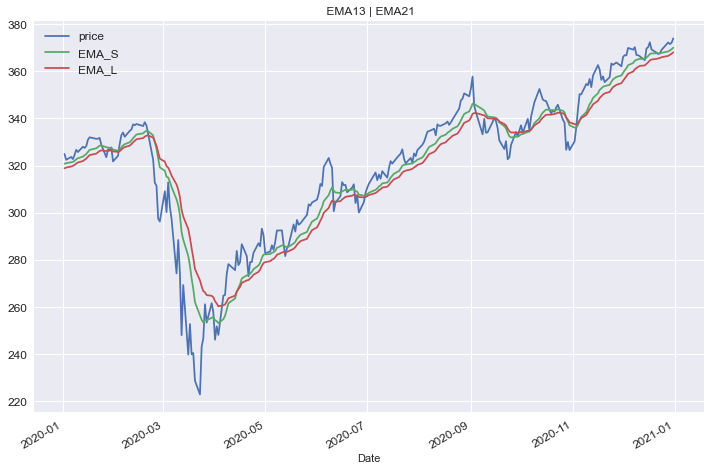

In [125]:
data.loc["2020", ["price", "EMA_S", "EMA_L"]].plot(figsize = (12, 8), fontsize = 12,
                                                   title = " EMA{} | EMA{}".format(ema_s, ema_l))
plt.legend(fontsize = 12)
plt.show()

In [126]:
data["position"] = np.where(data["EMA_S"] > data["EMA_L"], 1, -1 )

In [127]:
data

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-02  267.839996  268.809998  267.399994  268.769989  253.283142   
2018-01-03  268.959991  270.640015  268.959991  270.470001  254.885162   
2018-01-04  271.200012  272.160004  270.540009  271.609985  255.959488   
2018-01-05  272.510010  273.559998  271.950012  273.420013  257.665283   
2018-01-08  273.309998  274.100006  272.980011  273.920013  258.136414   
...                ...         ...         ...         ...         ...   
2021-02-22  387.059998  389.619995  386.739990  387.029999  385.766510   
2021-02-23  384.660004  388.950012  380.200012  387.500000  386.234985   
2021-02-24  386.329987  392.230011  385.269989  391.769989  390.491028   
2021-02-25  390.410004  391.880005  380.779999  382.329987  381.081848   
2021-02-26  384.350006  385.579987  378.230011  380.359985  379.118286   

               Volume       price       EMA_S       EMA_L  position  
Date                                                                 
2018-01-02   86655700  268.769989         NaN         NaN        -1  
2018-01-03   90070400  270.470001         NaN         NaN        -1  
2018-01-04   80636400  271.609985         NaN         NaN        -1  
2018-01-05   83524000  273.420013         NaN         NaN        -1  
2018-01-08   57319200  273.920013         NaN         NaN        -1  
...               ...         ...         ...         ...       ...  
2021-02-22   67414200  387.029999  388.352130  386.161472         1  
2021-02-23  107284100  387.500000  388.230397  386.283157         1  
2021-02-24   72433900  391.769989  388.736053  386.781960         1  
2021-02-25  146670500  382.329987  387.820901  386.377235         1  
2021-02-26  152701600  380.359985  386.755056  385.830212         1  

[794 rows x 10 columns]

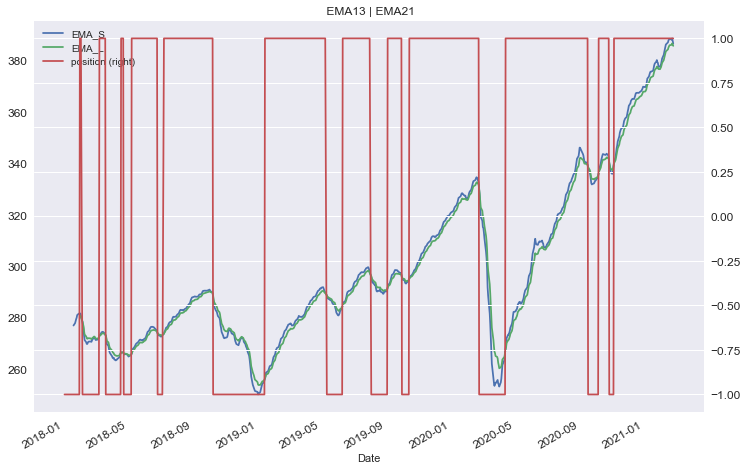

In [128]:
data.loc[:, ["EMA_S", "EMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                 title = " EMA{} | EMA{}".format(ema_s, ema_l))
plt.show()

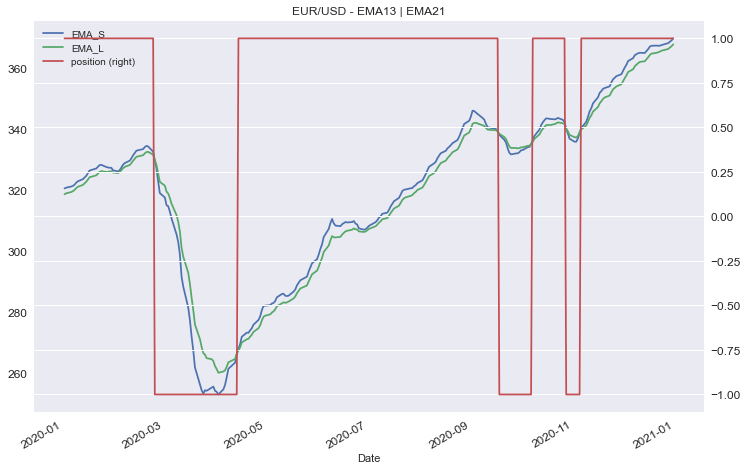

In [103]:
data.loc["2020", ["EMA_S", "EMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                     title = "EUR/USD - EMA{} | EMA{}".format(ema_s, ema_l))
plt.show()

## Vectorized Strategy Backtesting

In [129]:
data

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-02  267.839996  268.809998  267.399994  268.769989  253.283142   
2018-01-03  268.959991  270.640015  268.959991  270.470001  254.885162   
2018-01-04  271.200012  272.160004  270.540009  271.609985  255.959488   
2018-01-05  272.510010  273.559998  271.950012  273.420013  257.665283   
2018-01-08  273.309998  274.100006  272.980011  273.920013  258.136414   
...                ...         ...         ...         ...         ...   
2021-02-22  387.059998  389.619995  386.739990  387.029999  385.766510   
2021-02-23  384.660004  388.950012  380.200012  387.500000  386.234985   
2021-02-24  386.329987  392.230011  385.269989  391.769989  390.491028   
2021-02-25  390.410004  391.880005  380.779999  382.329987  381.081848   
2021-02-26  384.350006  385.579987  378.230011  380.359985  379.118286   

               Volume       price       EMA_S       EMA_L  position  
Date                                                                 
2018-01-02   86655700  268.769989         NaN         NaN        -1  
2018-01-03   90070400  270.470001         NaN         NaN        -1  
2018-01-04   80636400  271.609985         NaN         NaN        -1  
2018-01-05   83524000  273.420013         NaN         NaN        -1  
2018-01-08   57319200  273.920013         NaN         NaN        -1  
...               ...         ...         ...         ...       ...  
2021-02-22   67414200  387.029999  388.352130  386.161472         1  
2021-02-23  107284100  387.500000  388.230397  386.283157         1  
2021-02-24   72433900  391.769989  388.736053  386.781960         1  
2021-02-25  146670500  382.329987  387.820901  386.377235         1  
2021-02-26  152701600  380.359985  386.755056  385.830212         1  

[794 rows x 10 columns]

In [130]:
data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [131]:
data.dropna(inplace = True)

In [132]:
data

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-31  282.730011  283.299988  280.679993  281.899994  265.656616   
2018-02-01  281.070007  283.059998  280.679993  281.579987  265.354980   
2018-02-02  280.079987  280.230011  275.410004  275.450012  259.578278   
2018-02-05  273.450012  275.850006  263.309998  263.929993  248.722015   
2018-02-06  259.940002  269.700012  258.700012  269.130005  253.622482   
...                ...         ...         ...         ...         ...   
2021-02-22  387.059998  389.619995  386.739990  387.029999  385.766510   
2021-02-23  384.660004  388.950012  380.200012  387.500000  386.234985   
2021-02-24  386.329987  392.230011  385.269989  391.769989  390.491028   
2021-02-25  390.410004  391.880005  380.779999  382.329987  381.081848   
2021-02-26  384.350006  385.579987  378.230011  380.359985  379.118286   

               Volume       price       EMA_S       EMA_L  position   returns  
Date                                                                           
2018-01-31  108364800  281.899994  281.652772  280.671457         1  0.000497  
2018-02-01   90102500  281.579987  281.642012  280.765618         1 -0.001136  
2018-02-02  173174800  275.450012  280.731158  280.221629         1 -0.022010  
2018-02-05  294681800  263.929993  278.270123  278.573215        -1 -0.042722  
2018-02-06  355026800  269.130005  276.936111  277.627451        -1  0.019511  
...               ...         ...         ...         ...       ...       ...  
2021-02-22   67414200  387.029999  388.352130  386.161472         1 -0.007721  
2021-02-23  107284100  387.500000  388.230397  386.283157         1  0.001214  
2021-02-24   72433900  391.769989  388.736053  386.781960         1  0.010959  
2021-02-25  146670500  382.329987  387.820901  386.377235         1 -0.024391  
2021-02-26  152701600  380.359985  386.755056  385.830212         1 -0.005166  

[774 rows x 11 columns]

In [133]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [134]:
data

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-31  282.730011  283.299988  280.679993  281.899994  265.656616   
2018-02-01  281.070007  283.059998  280.679993  281.579987  265.354980   
2018-02-02  280.079987  280.230011  275.410004  275.450012  259.578278   
2018-02-05  273.450012  275.850006  263.309998  263.929993  248.722015   
2018-02-06  259.940002  269.700012  258.700012  269.130005  253.622482   
...                ...         ...         ...         ...         ...   
2021-02-22  387.059998  389.619995  386.739990  387.029999  385.766510   
2021-02-23  384.660004  388.950012  380.200012  387.500000  386.234985   
2021-02-24  386.329987  392.230011  385.269989  391.769989  390.491028   
2021-02-25  390.410004  391.880005  380.779999  382.329987  381.081848   
2021-02-26  384.350006  385.579987  378.230011  380.359985  379.118286   

               Volume       price       EMA_S       EMA_L  position   returns  \
Date                                                                            
2018-01-31  108364800  281.899994  281.652772  280.671457         1  0.000497   
2018-02-01   90102500  281.579987  281.642012  280.765618         1 -0.001136   
2018-02-02  173174800  275.450012  280.731158  280.221629         1 -0.022010   
2018-02-05  294681800  263.929993  278.270123  278.573215        -1 -0.042722   
2018-02-06  355026800  269.130005  276.936111  277.627451        -1  0.019511   
...               ...         ...         ...         ...       ...       ...   
2021-02-22   67414200  387.029999  388.352130  386.161472         1 -0.007721   
2021-02-23  107284100  387.500000  388.230397  386.283157         1  0.001214   
2021-02-24   72433900  391.769989  388.736053  386.781960         1  0.010959   
2021-02-25  146670500  382.329987  387.820901  386.377235         1 -0.024391   
2021-02-26  152701600  380.359985  386.755056  385.830212         1 -0.005166   

            strategy  
Date                  
2018-01-31       NaN  
2018-02-01 -0.001136  
2018-02-02 -0.022010  
2018-02-05 -0.042722  
2018-02-06 -0.019511  
...              ...  
2021-02-22 -0.007721  
2021-02-23  0.001214  
2021-02-24  0.010959  
2021-02-25 -0.024391  
2021-02-26 -0.005166  

[774 rows x 12 columns]

In [135]:
data.dropna(inplace = True)


In [136]:
data 

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-02-01  281.070007  283.059998  280.679993  281.579987  265.354980   
2018-02-02  280.079987  280.230011  275.410004  275.450012  259.578278   
2018-02-05  273.450012  275.850006  263.309998  263.929993  248.722015   
2018-02-06  259.940002  269.700012  258.700012  269.130005  253.622482   
2018-02-07  268.500000  272.359985  267.579987  267.670013  252.246567   
...                ...         ...         ...         ...         ...   
2021-02-22  387.059998  389.619995  386.739990  387.029999  385.766510   
2021-02-23  384.660004  388.950012  380.200012  387.500000  386.234985   
2021-02-24  386.329987  392.230011  385.269989  391.769989  390.491028   
2021-02-25  390.410004  391.880005  380.779999  382.329987  381.081848   
2021-02-26  384.350006  385.579987  378.230011  380.359985  379.118286   

               Volume       price       EMA_S       EMA_L  position   returns  \
Date                                                                            
2018-02-01   90102500  281.579987  281.642012  280.765618         1 -0.001136   
2018-02-02  173174800  275.450012  280.731158  280.221629         1 -0.022010   
2018-02-05  294681800  263.929993  278.270123  278.573215        -1 -0.042722   
2018-02-06  355026800  269.130005  276.936111  277.627451        -1  0.019511   
2018-02-07  167376100  267.670013  275.587884  276.639320        -1 -0.005440   
...               ...         ...         ...         ...       ...       ...   
2021-02-22   67414200  387.029999  388.352130  386.161472         1 -0.007721   
2021-02-23  107284100  387.500000  388.230397  386.283157         1  0.001214   
2021-02-24   72433900  391.769989  388.736053  386.781960         1  0.010959   
2021-02-25  146670500  382.329987  387.820901  386.377235         1 -0.024391   
2021-02-26  152701600  380.359985  386.755056  385.830212         1 -0.005166   

            strategy  
Date                  
2018-02-01 -0.001136  
2018-02-02 -0.022010  
2018-02-05 -0.042722  
2018-02-06 -0.019511  
2018-02-07  0.005440  
...              ...  
2021-02-22 -0.007721  
2021-02-23  0.001214  
2021-02-24  0.010959  
2021-02-25 -0.024391  
2021-02-26 -0.005166  

[773 rows x 12 columns]

In [137]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [138]:
data

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-02-01  281.070007  283.059998  280.679993  281.579987  265.354980   
2018-02-02  280.079987  280.230011  275.410004  275.450012  259.578278   
2018-02-05  273.450012  275.850006  263.309998  263.929993  248.722015   
2018-02-06  259.940002  269.700012  258.700012  269.130005  253.622482   
2018-02-07  268.500000  272.359985  267.579987  267.670013  252.246567   
...                ...         ...         ...         ...         ...   
2021-02-22  387.059998  389.619995  386.739990  387.029999  385.766510   
2021-02-23  384.660004  388.950012  380.200012  387.500000  386.234985   
2021-02-24  386.329987  392.230011  385.269989  391.769989  390.491028   
2021-02-25  390.410004  391.880005  380.779999  382.329987  381.081848   
2021-02-26  384.350006  385.579987  378.230011  380.359985  379.118286   

               Volume       price       EMA_S       EMA_L  position   returns  \
Date                                                                            
2018-02-01   90102500  281.579987  281.642012  280.765618         1 -0.001136   
2018-02-02  173174800  275.450012  280.731158  280.221629         1 -0.022010   
2018-02-05  294681800  263.929993  278.270123  278.573215        -1 -0.042722   
2018-02-06  355026800  269.130005  276.936111  277.627451        -1  0.019511   
2018-02-07  167376100  267.670013  275.587884  276.639320        -1 -0.005440   
...               ...         ...         ...         ...       ...       ...   
2021-02-22   67414200  387.029999  388.352130  386.161472         1 -0.007721   
2021-02-23  107284100  387.500000  388.230397  386.283157         1  0.001214   
2021-02-24   72433900  391.769989  388.736053  386.781960         1  0.010959   
2021-02-25  146670500  382.329987  387.820901  386.377235         1 -0.024391   
2021-02-26  152701600  380.359985  386.755056  385.830212         1 -0.005166   

            strategy  creturns  cstrategy  
Date                                       
2018-02-01 -0.001136  0.998865   0.998865  
2018-02-02 -0.022010  0.977120   0.977120  
2018-02-05 -0.042722  0.936254   0.936254  
2018-02-06 -0.019511  0.954700   0.918164  
2018-02-07  0.005440  0.949521   0.923172  
...              ...       ...        ...  
2021-02-22 -0.007721  1.372934   1.035997  
2021-02-23  0.001214  1.374601   1.037255  
2021-02-24  0.010959  1.389748   1.048685  
2021-02-25 -0.024391  1.356261   1.023416  
2021-02-26 -0.005166  1.349273   1.018143  

[773 rows x 14 columns]

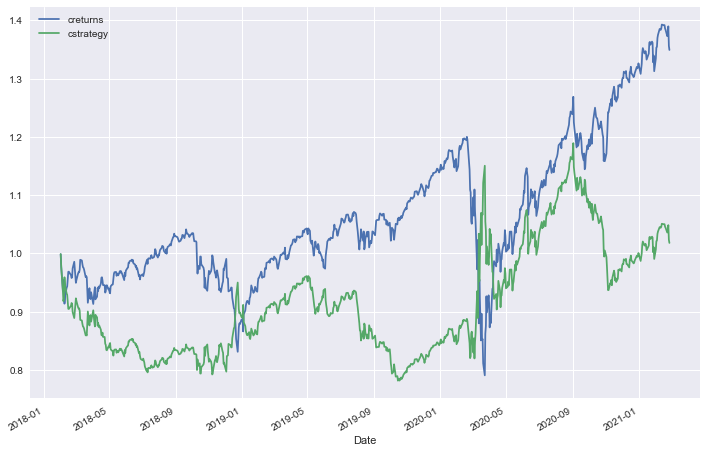

In [139]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()

In [140]:
strategy = data.copy()
strategy

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-02-01  281.070007  283.059998  280.679993  281.579987  265.354980   
2018-02-02  280.079987  280.230011  275.410004  275.450012  259.578278   
2018-02-05  273.450012  275.850006  263.309998  263.929993  248.722015   
2018-02-06  259.940002  269.700012  258.700012  269.130005  253.622482   
2018-02-07  268.500000  272.359985  267.579987  267.670013  252.246567   
...                ...         ...         ...         ...         ...   
2021-02-22  387.059998  389.619995  386.739990  387.029999  385.766510   
2021-02-23  384.660004  388.950012  380.200012  387.500000  386.234985   
2021-02-24  386.329987  392.230011  385.269989  391.769989  390.491028   
2021-02-25  390.410004  391.880005  380.779999  382.329987  381.081848   
2021-02-26  384.350006  385.579987  378.230011  380.359985  379.118286   

               Volume       price       EMA_S       EMA_L  position   returns  \
Date                                                                            
2018-02-01   90102500  281.579987  281.642012  280.765618         1 -0.001136   
2018-02-02  173174800  275.450012  280.731158  280.221629         1 -0.022010   
2018-02-05  294681800  263.929993  278.270123  278.573215        -1 -0.042722   
2018-02-06  355026800  269.130005  276.936111  277.627451        -1  0.019511   
2018-02-07  167376100  267.670013  275.587884  276.639320        -1 -0.005440   
...               ...         ...         ...         ...       ...       ...   
2021-02-22   67414200  387.029999  388.352130  386.161472         1 -0.007721   
2021-02-23  107284100  387.500000  388.230397  386.283157         1  0.001214   
2021-02-24   72433900  391.769989  388.736053  386.781960         1  0.010959   
2021-02-25  146670500  382.329987  387.820901  386.377235         1 -0.024391   
2021-02-26  152701600  380.359985  386.755056  385.830212         1 -0.005166   

            strategy  creturns  cstrategy  
Date                                       
2018-02-01 -0.001136  0.998865   0.998865  
2018-02-02 -0.022010  0.977120   0.977120  
2018-02-05 -0.042722  0.936254   0.936254  
2018-02-06 -0.019511  0.954700   0.918164  
2018-02-07  0.005440  0.949521   0.923172  
...              ...       ...        ...  
2021-02-22 -0.007721  1.372934   1.035997  
2021-02-23  0.001214  1.374601   1.037255  
2021-02-24  0.010959  1.389748   1.048685  
2021-02-25 -0.024391  1.356261   1.023416  
2021-02-26 -0.005166  1.349273   1.018143  

[773 rows x 14 columns]

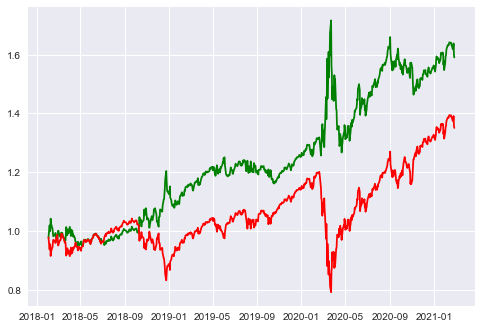

In [143]:
###second method
strategy['ret'] =pd.DataFrame(strategy['price'].pct_change())
strategy['st_returns'] = strategy['ret']*strategy['position']
fig, ax = plt.subplots()
plt.plot(((1+strategy['st_returns'][1:]  ).cumprod()), color = 'green')
plt.plot(((1+strategy['ret'][1:]).cumprod()), color = 'red')

In [ ]:
#############ADD TRAILING STOP###############